In [122]:
# You'll already seen one Non-linear regression Model. The Polynomial Regression model.
# Here we see the second one. SVR or Support Vector Regression

In [123]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [124]:
sklearn.__version__

'0.19.0'

In [125]:
%matplotlib inline

In [126]:
# The problem statement is same as PLR. We need to predict salary (DV) based on Level (IV).
# Again as relationship b/w Salary and Level is non-linear. If you draw a scatter graph (or see in PLR where its done
# already), you'll see the relationship curve.
dataset = pd.read_csv('/home/rajatgirotra/study/machine_learning/course/MachineLearningA-ZTemplateFolder/Part2_Regression/Section7_SupportVectorRegressionSVR/Position_Salaries.csv')

In [127]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [128]:
# Separate DV (dependant variable) and IV (independant variables)
# You'll see below why we dont need 'Position' col
X = dataset.iloc[:, 1:-1].values  # IN ALL ML models, The features should always be a matrix, not a simple array
y = dataset.iloc[:, -1].values

In [129]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [130]:
# Note that sklearn SVR Algo's do not apply feature scaling, unlike the Regression models which do.
# So here we need to apply it on our own.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

/home/rajatgirotra/tools/python/3.6.2/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [131]:
y = y.reshape((10,))
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [132]:
# Create an SVR regressor and fit the model.
# I'll add more detail later on what SVR model really is
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [133]:
# predictions
y_pred = regressor.predict(6.5)
# Since we applied feature scaling, the y_pred returned is also scaled, so we need to reverse scale or inverse scale
print('y_pred %s\n' % y_pred)

# first we need to feed the transformed value of 6.5 to the sc_X object. That returns the transformed value of y.
# on that transformed y value we need to apply inverse transform using the sc_Y object.
# We need to use np.array([[6.5]]), because that is what the api expects. 
y_pred_scaled = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print('y_pred_scaled %s\n' % y_pred_scaled)

y_pred [ 0.01158103]

y_pred_scaled [ 170370.0204065]



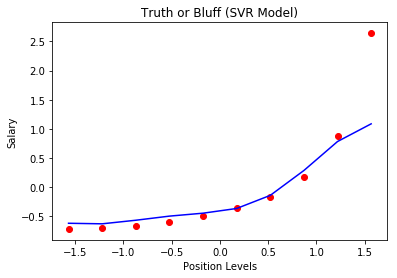

In [135]:
# Create a visualization
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

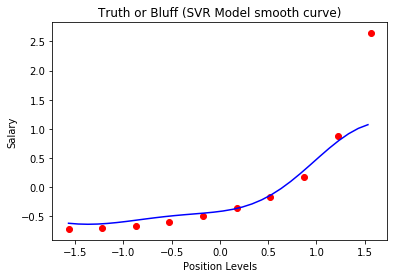

In [138]:
# Create a much smoother curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (SVR Model smooth curve)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()